In [1]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from tensorflow.keras import optimizers
from keras.preprocessing.image import ImageDataGenerator


In [2]:
# model katman ve düğüm sayısı belirleme
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))


In [3]:
# modeli oluşturma (compile işlemi)
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [4]:
# Data setini import ettik
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [5]:
#eğitim kısmı
history = model.fit_generator(
                training_set,
                steps_per_epoch = len(training_set),
                epochs = 100,
                validation_data = test_set,
                validation_steps = len(test_set))

Epoch 1/100


<ipython-input-5-ffd7fd1ce5bb>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


132/132 [==============================] - 37s 271ms/step - loss: 0.5877 - acc: 0.6777 - val_loss: 0.4651 - val_acc: 0.7515
Epoch 2/100
132/132 [==============================] - 34s 256ms/step - loss: 0.4629 - acc: 0.7763 - val_loss: 0.4481 - val_acc: 0.7803
Epoch 3/100
132/132 [==============================] - 34s 258ms/step - loss: 0.4315 - acc: 0.7986 - val_loss: 0.3907 - val_acc: 0.8258
Epoch 4/100
132/132 [==============================] - 34s 259ms/step - loss: 0.4155 - acc: 0.7971 - val_loss: 0.3686 - val_acc: 0.8258
Epoch 5/100
132/132 [==============================] - 34s 258ms/step - loss: 0.3989 - acc: 0.8108 - val_loss: 0.3637 - val_acc: 0.8212
Epoch 6/100
132/132 [==============================] - 34s 258ms/step - loss: 0.3854 - acc: 0.8138 - val_loss: 0.3706 - val_acc: 0.8288
Epoch 7/100
132/132 [==============================] - 34s 259ms/step - loss: 0.3793 - acc: 0.8142 - val_loss: 0.3739 - val_acc: 0.8364
Epoch 8/100
132/132 [==============================] - 34s 2

Epoch 61/100
132/132 [==============================] - 37s 283ms/step - loss: 0.0271 - acc: 0.9909 - val_loss: 0.7803 - val_acc: 0.8424
Epoch 62/100
132/132 [==============================] - 37s 279ms/step - loss: 0.0282 - acc: 0.9901 - val_loss: 0.7693 - val_acc: 0.8333
Epoch 63/100
132/132 [==============================] - 35s 269ms/step - loss: 0.0211 - acc: 0.9936 - val_loss: 0.8115 - val_acc: 0.8439
Epoch 64/100
132/132 [==============================] - 36s 274ms/step - loss: 0.0213 - acc: 0.9920 - val_loss: 0.7147 - val_acc: 0.8470
Epoch 65/100
132/132 [==============================] - 36s 269ms/step - loss: 0.0201 - acc: 0.9943 - val_loss: 0.7577 - val_acc: 0.8394
Epoch 66/100
132/132 [==============================] - 38s 290ms/step - loss: 0.0229 - acc: 0.9917 - val_loss: 0.7195 - val_acc: 0.8470
Epoch 67/100
132/132 [==============================] - 36s 273ms/step - loss: 0.0155 - acc: 0.9966 - val_loss: 0.7835 - val_acc: 0.8379
Epoch 68/100
132/132 [===================

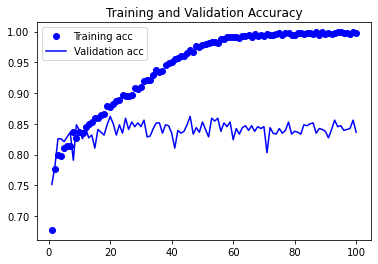

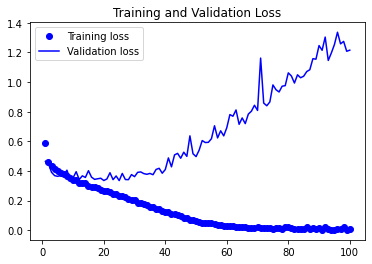

In [6]:
# eğitilen modelin sonuçlarını gösterme
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

### Epoch Kesme İşlemi


In [11]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [12]:
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [13]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [14]:
history1 = model.fit_generator(
                training_set,
                steps_per_epoch = len(training_set),
                epochs = 13,
                validation_data = test_set,
                validation_steps = len(test_set))

Epoch 1/13


<ipython-input-14-ec72a6c8fe22>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model.fit_generator(


100/100 [==============================] - 31s 301ms/step - loss: 0.6274 - acc: 0.6485 - val_loss: 0.5168 - val_acc: 0.7750
Epoch 2/13
100/100 [==============================] - 30s 301ms/step - loss: 0.5090 - acc: 0.7456 - val_loss: 0.4189 - val_acc: 0.7867
Epoch 3/13
100/100 [==============================] - 30s 296ms/step - loss: 0.4748 - acc: 0.7630 - val_loss: 0.4205 - val_acc: 0.7917
Epoch 4/13
100/100 [==============================] - 29s 293ms/step - loss: 0.4530 - acc: 0.7772 - val_loss: 0.4818 - val_acc: 0.7467
Epoch 5/13
100/100 [==============================] - 29s 294ms/step - loss: 0.4261 - acc: 0.7962 - val_loss: 0.4102 - val_acc: 0.7933
Epoch 6/13
100/100 [==============================] - 29s 292ms/step - loss: 0.4195 - acc: 0.7947 - val_loss: 0.3829 - val_acc: 0.8067
Epoch 7/13
100/100 [==============================] - 29s 291ms/step - loss: 0.4002 - acc: 0.8027 - val_loss: 0.3688 - val_acc: 0.8567
Epoch 8/13
100/100 [==============================] - 29s 294ms/st

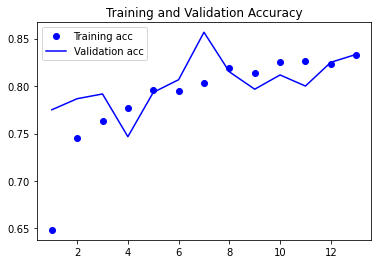

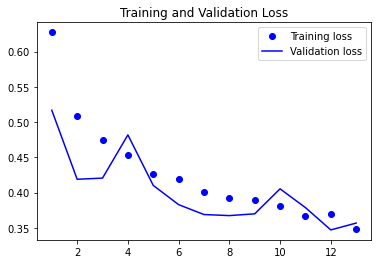

In [15]:
acc = history1.history['acc']
val_acc = history1.history['val_acc']
loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Drop-Out kısmı


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.3)) #dropout yaptığımız yer 
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [17]:
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [19]:
history2 = model.fit_generator(
                training_set,
                steps_per_epoch = len(training_set),
                epochs = 15,
                validation_data = test_set,
                validation_steps = len(test_set))

Epoch 1/15


<ipython-input-19-c743601e0fc3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history2 = model.fit_generator(


132/132 [==============================] - 41s 302ms/step - loss: 0.5501 - acc: 0.7072 - val_loss: 0.4381 - val_acc: 0.7591
Epoch 2/15
132/132 [==============================] - 39s 296ms/step - loss: 0.4530 - acc: 0.7732 - val_loss: 0.4259 - val_acc: 0.7788
Epoch 3/15
132/132 [==============================] - 38s 288ms/step - loss: 0.4432 - acc: 0.7793 - val_loss: 0.3961 - val_acc: 0.8015
Epoch 4/15
132/132 [==============================] - 38s 288ms/step - loss: 0.4202 - acc: 0.7937 - val_loss: 0.3819 - val_acc: 0.8197
Epoch 5/15
132/132 [==============================] - 38s 289ms/step - loss: 0.4097 - acc: 0.8051 - val_loss: 0.3647 - val_acc: 0.8303
Epoch 6/15
132/132 [==============================] - 38s 285ms/step - loss: 0.3987 - acc: 0.8127 - val_loss: 0.3654 - val_acc: 0.8136
Epoch 7/15
132/132 [==============================] - 38s 287ms/step - loss: 0.3865 - acc: 0.8191 - val_loss: 0.3563 - val_acc: 0.8424
Epoch 8/15
132/132 [==============================] - 40s 300ms/st

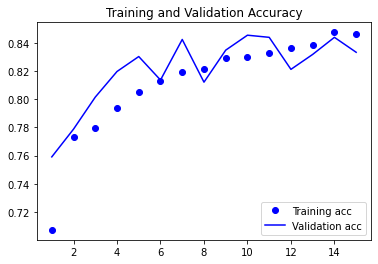

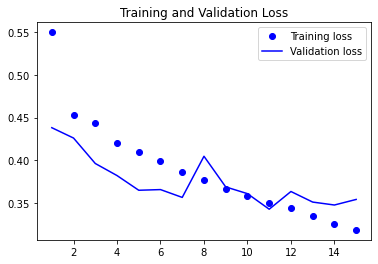

In [20]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

# Katman ekleme düğüm sayıları ile oynama kısmı


In [29]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), activation = 'relu',
                       input_shape = (150,150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(256, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [30]:
model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics = ['acc'])

In [31]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [32]:
history3 = model.fit_generator(
                training_set,
                steps_per_epoch = len(training_set),
                epochs = 15,
                validation_data = test_set,
                validation_steps = len(test_set))

Epoch 1/15


<ipython-input-32-ec084dd42167>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history3 = model.fit_generator(


132/132 [==============================] - 51s 384ms/step - loss: 0.5921 - acc: 0.6724 - val_loss: 0.6934 - val_acc: 0.6379
Epoch 2/15
132/132 [==============================] - 50s 380ms/step - loss: 0.4962 - acc: 0.7581 - val_loss: 0.4306 - val_acc: 0.7803
Epoch 3/15
132/132 [==============================] - 51s 388ms/step - loss: 0.4542 - acc: 0.7759 - val_loss: 0.4051 - val_acc: 0.8227
Epoch 4/15
132/132 [==============================] - 49s 368ms/step - loss: 0.4366 - acc: 0.7842 - val_loss: 0.3980 - val_acc: 0.8167
Epoch 5/15
132/132 [==============================] - 50s 379ms/step - loss: 0.4201 - acc: 0.8032 - val_loss: 0.3675 - val_acc: 0.8212
Epoch 6/15
132/132 [==============================] - 49s 370ms/step - loss: 0.4010 - acc: 0.8199 - val_loss: 0.3799 - val_acc: 0.8288
Epoch 7/15
132/132 [==============================] - 50s 378ms/step - loss: 0.3942 - acc: 0.8100 - val_loss: 0.4456 - val_acc: 0.7848
Epoch 8/15
132/132 [==============================] - 51s 385ms/st

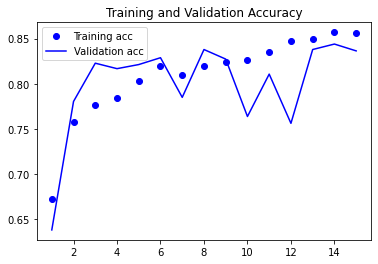

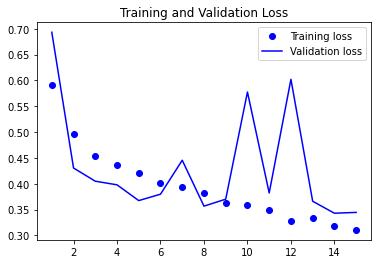

In [33]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

Data Agumantation (Veri Çoğaltma)

In [34]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer=optimizers.RMSprop(learning_rate=1e-4),
             metrics=['acc'])

In [35]:
train_datagen = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=40,
                width_shift_range=0.3,
                height_shift_range=0.3,
                shear_range=0.3,
                zoom_range=0.3,
                horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size = (150,150),
                                                 batch_size = 20,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size = (150,150),
                                            batch_size = 20,
                                            class_mode = 'binary')

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [36]:
history4 = model.fit_generator(
                training_set,
                steps_per_epoch = len(training_set),
                epochs = 15,
                validation_data = test_set,
                validation_steps = len(test_set))

Epoch 1/15


<ipython-input-36-aa944477ff16>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history4 = model.fit_generator(


132/132 [==============================] - 43s 315ms/step - loss: 0.6041 - acc: 0.6492 - val_loss: 0.4608 - val_acc: 0.7803
Epoch 2/15
132/132 [==============================] - 40s 302ms/step - loss: 0.4885 - acc: 0.7520 - val_loss: 0.4705 - val_acc: 0.7591
Epoch 3/15
132/132 [==============================] - 42s 321ms/step - loss: 0.4533 - acc: 0.7728 - val_loss: 0.4642 - val_acc: 0.7758
Epoch 4/15
132/132 [==============================] - 42s 321ms/step - loss: 0.4432 - acc: 0.7804 - val_loss: 0.4811 - val_acc: 0.7636
Epoch 5/15
132/132 [==============================] - 40s 305ms/step - loss: 0.4366 - acc: 0.7812 - val_loss: 0.4369 - val_acc: 0.7833
Epoch 6/15
132/132 [==============================] - 43s 325ms/step - loss: 0.4333 - acc: 0.7823 - val_loss: 0.4174 - val_acc: 0.7879
Epoch 7/15
132/132 [==============================] - 41s 309ms/step - loss: 0.4281 - acc: 0.7967 - val_loss: 0.3907 - val_acc: 0.7955
Epoch 8/15
132/132 [==============================] - 45s 340ms/st

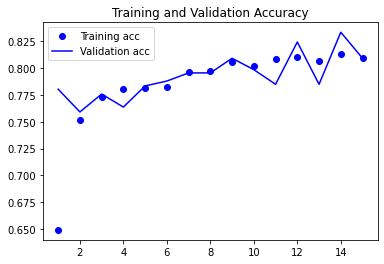

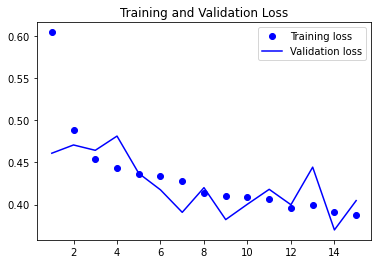

In [38]:
acc = history4.history['acc']
val_acc = history4.history['val_acc']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()